# News Headlines Sentiment

Use the news api to pull the latest news articles for bitcoin and ethereum and create a DataFrame of sentiment scores for each coin. 

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
from nltk.sentiment.vader import SentimentIntensityAnalyzer

from newsapi.newsapi_client import NewsApiClient

analyzer = SentimentIntensityAnalyzer()


%matplotlib inline

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [2]:
# Read your api key environment variable
load_dotenv()

news_api_key = os.getenv("news_api_key")

#help(NewsApiClient)



In [3]:
# Create a newsapi client
#help(NewsApiClient)

newsapi = NewsApiClient(news_api_key)

#help(newsapi)

test = newsapi.get_everything(q='bitcoin')

#type(test)

help(newsapi.get_everything)



Help on method get_everything in module newsapi.newsapi_client:

get_everything(q=None, sources=None, domains=None, exclude_domains=None, from_param=None, to=None, language=None, sort_by=None, page=None, page_size=None) method of newsapi.newsapi_client.NewsApiClient instance
        Search through millions of articles from over 5,000 large and small news sources and blogs.
    
        Optional parameters:
            (str) q - return headlines w/ specified coin! Valid values are:
                        'bitcoin', 'trump', 'tesla', 'ethereum', etc
    
            (str) sources - return headlines of news sources! some Valid values are:
                        'bbc-news', 'the-verge', 'abc-news', 'crypto coins news',
                        'ary news','associated press','wired','aftenposten','australian financial review','axios',
                        'bbc news','bild','blasting news','bloomberg','business insider','engadget','google news',
                        'hacker news','info

In [4]:
# Fetch the Bitcoin news articles
bitcoin_headlines = newsapi.get_everything(q='bitcoin',
                                           language="en",
                                           page_size=100,
                                           sort_by="relevancy")



bitcoin_headlines['articles'][0]

len(bitcoin_headlines['articles'])

100

In [5]:
# Fetch the Ethereum news articles
ethereum_headlines = newsapi.get_everything(q='ethereum',
                                            language="en",
                                            page_size=100,
                                            sort_by="relevancy")


# Confirm output type of sentiment analyzer
test_sentiment = analyzer.polarity_scores(ethereum_headlines['articles'][0]['content'])

test_sentiment

type(ethereum_headlines['articles'][0]['content'])

len(ethereum_headlines['articles'])

100

In [6]:
# Create the Bitcoin sentiment scores DataFrame

bitcoin_sentiment = []

for article in bitcoin_headlines["articles"]:
    
    try:
    
        text = article["content"]
        date = article["publishedAt"][:10]
    
        sentiment = analyzer.polarity_scores(text)
    
        compound = sentiment["compound"]
        positive = sentiment["pos"]
        negative = sentiment["neg"]
        neutral = sentiment["neu"]


        bitcoin_sentiment.append({
            "date": date,
            "text": text,
            "compound": compound,
            "positive": positive,
            "negative": negative,
            "neutral": neutral
            })
        
    except AttributeError:
        
        pass

type(bitcoin_sentiment[0]['text'])

# I first tried to create the above function with out the 'try...except...pass' structure.  I kept getting the error
# "AttributeError: 'NoneType' object has no attribute 'encode'".  What exactly does this mean?  Were some article 
# texts NoneTypes instead of strings?  In any case, the 'try' seemed to fix it.  (Used in class exercise.)


bitcoin_sentiment

bitcoin_df = pd.DataFrame(bitcoin_sentiment)

columns = ["date", "text", "compound", "positive", "negative", "neutral"]

# Rearrange columns
bitcoin_df = bitcoin_df[columns]

bitcoin_df.head()

,date,text,compound,positive,negative,neutral
0,2020-09-10,Two alleged crypto traders in Singapore appare...,-0.6908,0.000,0.160,0.840
1,2020-09-22,A US district judge has sentenced a UK Nationa...,-0.5267,0.000,0.128,0.872
2,2020-09-08,"By Alexis Akwagyiram, Tom Wilson\r\n* Monthly ...",0.0000,0.000,0.000,1.000
3,2020-08-23,“The COVID-19 pandemic has resulted in a mass ...,0.2732,0.063,0.000,0.937
4,2020-09-08,"LAGOS/LONDON (Reuters) - Four months ago, Abol...",0.0000,0.000,0.000,1.000


In [7]:
# Create the ethereum sentiment scores DataFrame

ethereum_sentiment = []

for article in ethereum_headlines["articles"]:
    
    try:
    
        text = article["content"]
        date = article["publishedAt"][:10]
    
        sentiment = analyzer.polarity_scores(text)
    
        compound = sentiment["compound"]
        positive = sentiment["pos"]
        negative = sentiment["neg"]
        neutral = sentiment["neu"]


        ethereum_sentiment.append({
            "date": date,
            "text": text,
            "compound": compound,
            "positive": positive,
            "negative": negative,
            "neutral": neutral
            })
        
    except AttributeError:
        
        pass

type(ethereum_sentiment[0]['text'])


ethereum_sentiment

ethereum_df = pd.DataFrame(ethereum_sentiment)


# Rearrange columns

columns = ["date", "text", "compound", "positive", "negative", "neutral"]
ethereum_df = ethereum_df[columns]

ethereum_df.head()


,date,text,compound,positive,negative,neutral
0,2020-09-02,If you've interacted with cryptocurrencies in ...,0.7506,0.209,0.0,0.791
1,2020-09-07,TL;DR: The Complete Stock and Cryptocurrency I...,0.0000,0.000,0.0,1.000
2,2020-09-18,"September\r\n18, 2020\r\n6 min read\r\nOpinion...",0.0000,0.000,0.0,1.000
3,2020-08-26,LONDON (Reuters) - It sounds like a surefire b...,0.7579,0.181,0.0,0.819
4,2020-08-25,NEW YORK (Reuters) - Brooklyn-based technology...,0.0000,0.000,0.0,1.000


In [8]:
# Describe the Bitcoin Sentiment
bitcoin_df.describe()

,compound,positive,negative,neutral
count,95.000000,95.000000,95.000000,95.000000
mean,0.189797,0.079432,0.037747,0.882789
std,0.460427,0.068887,0.066861,0.081657
min,-0.886000,0.000000,0.000000,0.640000
25%,0.000000,0.000000,0.000000,0.831000
50%,0.340000,0.090000,0.000000,0.910000
75%,0.507000,0.100000,0.061000,0.915000
max,0.923100,0.326000,0.303000,1.000000


In [9]:
# Describe the Ethereum Sentiment
ethereum_df.describe()

,compound,positive,negative,neutral
count,95.000000,95.000000,95.000000,95.000000
mean,0.162800,0.070832,0.031947,0.897211
std,0.387956,0.070182,0.062678,0.088147
min,-0.910000,0.000000,0.000000,0.607000
25%,0.000000,0.000000,0.000000,0.840500
50%,0.177900,0.069000,0.000000,0.910000
75%,0.471800,0.106500,0.055500,1.000000
max,0.851900,0.311000,0.347000,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A: 

Q: Which coin had the highest compound score?

A: 

Q. Which coin had the highest positive score?

A: 

---

# Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word
2. Remove Punctuation
3. Remove Stopwords

In [10]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

lemmatizer = WordNetLemmatizer()

In [11]:
# Expand the default stopwords list if necessary

type(ethereum_df['text'])
ethereum_df.dtypes

help(word_tokenize)

Help on function word_tokenize in module nltk.tokenize:

word_tokenize(text, language='english', preserve_line=False)
    Return a tokenized copy of *text*,
    using NLTK's recommended word tokenizer
    (currently an improved :class:`.TreebankWordTokenizer`
    along with :class:`.PunktSentenceTokenizer`
    for the specified language).
    
    :param text: text to split into words
    :type text: str
    :param language: the model name in the Punkt corpus
    :type language: str
    :param preserve_line: An option to keep the preserve the sentence and not sentence tokenize it.
    :type preserve_line: bool



In [12]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""       
    
    # Remove the punctuation
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', text)
    
    # Create a list of the words
    words = word_tokenize(re_clean)
    
    # Lemmatize Words into root words
    lem = [lemmatizer.lemmatize(word) for word in words]
    
    # Remove the stop words
    # Convert the words to lowercase
    sw = set(stopwords.words('english'))
    tokens = [word.lower() for word in lem if word.lower() not in sw]
        
    return tokens


# Tested function on simple text
# hello = "Hello!  My name is Andrew.  What is yours?"
# tokenizer(hello)

# Tested on one ethereum article
tokenizer(ethereum_df['text'][0])

['youve',
 'interacted',
 'cryptocurrencies',
 'past',
 'couple',
 'year',
 'good',
 'chance',
 'youve',
 'used',
 'metamask',
 'cryptocurrency',
 'wallet',
 'form',
 'browser',
 'extension',
 'support',
 'ether',
 'char']

In [13]:
# Create a new tokens column for bitcoin

bitcoin_df['tokens'] = [tokenizer(text) for text in bitcoin_df['text']]


# Rearrange columns

columns = ["date", "compound", "positive", "negative", "neutral", "text", "tokens"]
bitcoin_df = bitcoin_df[columns]

bitcoin_df.head()

,date,compound,positive,negative,neutral,text,tokens
0,2020-09-10,-0.6908,0.000,0.160,0.840,Two alleged crypto traders in Singapore appare...,"[two, alleged, crypto, trader, singapore, appa..."
1,2020-09-22,-0.5267,0.000,0.128,0.872,A US district judge has sentenced a UK Nationa...,"[us, district, judge, ha, sentenced, uk, natio..."
2,2020-09-08,0.0000,0.000,0.000,1.000,"By Alexis Akwagyiram, Tom Wilson\r\n* Monthly ...","[alexis, akwagyiram, tom, wilson, monthly, cry..."
3,2020-08-23,0.2732,0.063,0.000,0.937,“The COVID-19 pandemic has resulted in a mass ...,"[covid, pandemic, ha, resulted, mass, shift, w..."
4,2020-09-08,0.0000,0.000,0.000,1.000,"LAGOS/LONDON (Reuters) - Four months ago, Abol...","[lagoslondon, reuters, four, month, ago, abola..."


In [14]:
# Create a new tokens column for ethereum

ethereum_df['tokens'] = [tokenizer(text) for text in ethereum_df['text']]


# Rearrange columns

columns = ["date", "compound", "positive", "negative", "neutral", "text", "tokens"]
ethereum_df = ethereum_df[columns]

ethereum_df.head()

,date,compound,positive,negative,neutral,text,tokens
0,2020-09-02,0.7506,0.209,0.0,0.791,If you've interacted with cryptocurrencies in ...,"[youve, interacted, cryptocurrencies, past, co..."
1,2020-09-07,0.0000,0.000,0.0,1.000,TL;DR: The Complete Stock and Cryptocurrency I...,"[tldr, complete, stock, cryptocurrency, invest..."
2,2020-09-18,0.0000,0.000,0.0,1.000,"September\r\n18, 2020\r\n6 min read\r\nOpinion...","[september, min, readopinions, expressed, entr..."
3,2020-08-26,0.7579,0.181,0.0,0.819,LONDON (Reuters) - It sounds like a surefire b...,"[london, reuters, sound, like, surefire, bet, ..."
4,2020-08-25,0.0000,0.000,0.0,1.000,NEW YORK (Reuters) - Brooklyn-based technology...,"[new, york, reuters, brooklynbased, technology..."


---

# NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [15]:
from collections import Counter
from nltk import ngrams

In [16]:
# Generate the Bitcoin N-grams where N=2

bitcoin_article_tokens = [token for token in bitcoin_df['tokens']]

bitcoin_words_tokenized = []

for articles in bitcoin_article_tokens:
    
    for word in articles:
        
        bitcoin_words_tokenized.append(word)
        
    
bitcoin_words_tokenized

bigram_counts_bitcoin = Counter(ngrams(bitcoin_words_tokenized, n=2)) 



print(dict(bigram_counts_bitcoin.most_common(10)))

{('satoshi', 'nakaboto'): 42, ('bitcoin', 'char'): 22, ('char', 'robot'): 21, ('robot', 'colleague'): 21, ('colleague', 'satoshi'): 21, ('nakaboto', 'writes'): 21, ('writes', 'bitcoin'): 21, ('every', 'fucking'): 21, ('fucking', 'daywelcome'): 21, ('daywelcome', 'another'): 21}


In [17]:
# Generate the Ethereum N-grams where N=2

ethereum_article_tokens = [token for token in ethereum_df['tokens']]

ethereum_words_tokenized = []

for articles in ethereum_article_tokens:
    
    for word in articles:
        
        ethereum_words_tokenized.append(word)
        
    
ethereum_words_tokenized

bigram_counts_ethereum = Counter(ngrams(ethereum_words_tokenized, n=2)) 

print(dict(bigram_counts_ethereum.most_common(10)))

{('char', 'ethereum'): 11, ('decentralized', 'finance'): 11, ('finance', 'defi'): 10, ('ethereum', 'blockchain'): 6, ('char', 'bitcoin'): 6, ('ethereum', 'miner'): 6, ('smart', 'contract'): 5, ('around', 'utc'): 5, ('bitcoin', 'btc'): 4, ('btc', 'trading'): 4}


In [18]:
# Use the token_count function to generate the top 10 words from each coin
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [19]:
# Get the top 10 words for Bitcoin

token_count(bitcoin_words_tokenized)

[('bitcoin', 102),
 ('char', 95),
 ('satoshi', 42),
 ('nakaboto', 42),
 ('every', 24),
 ('today', 23),
 ('going', 23),
 ('another', 22),
 ('edition', 22),
 ('ha', 21)]

In [20]:
# Get the top 10 words for Ethereum
token_count(ethereum_words_tokenized)

[('char', 95),
 ('ethereum', 62),
 ('ha', 32),
 ('blockchain', 25),
 ('bitcoin', 25),
 ('defi', 19),
 ('decentralized', 15),
 ('crypto', 15),
 ('cryptocurrency', 14),
 ('finance', 12)]

# Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [21]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

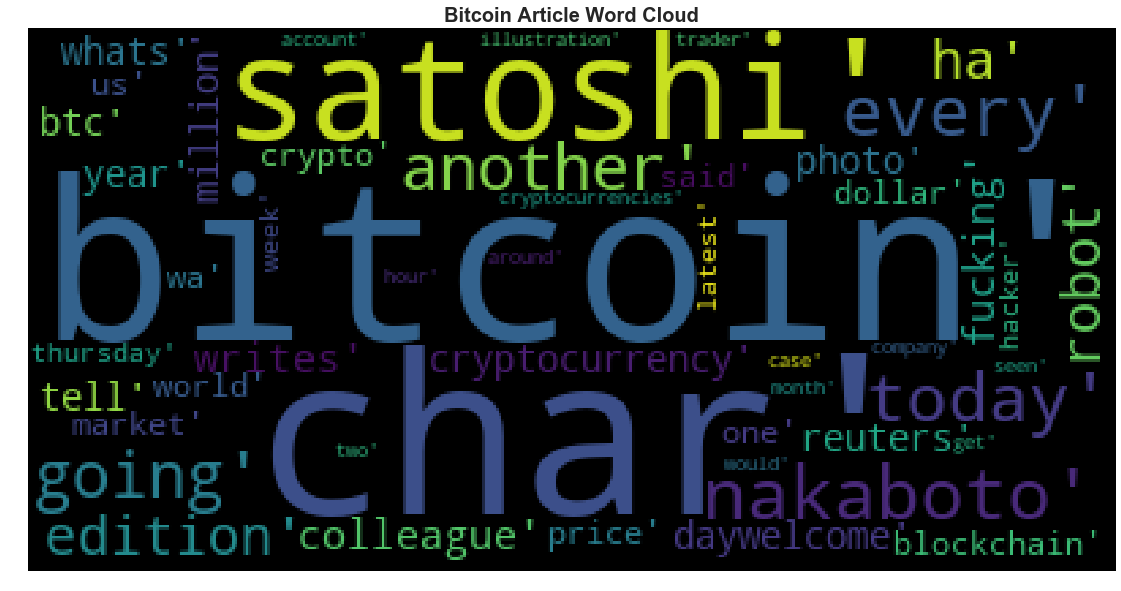

In [22]:
# Generate the Bitcoin word cloud

# Must convert from list to string

top_words_bitcoin = str(token_count(bitcoin_words_tokenized, N=50))

wordcloud = WordCloud().generate(top_words_bitcoin)
plt.imshow(wordcloud)
plt.axis('off')
fontdict = {"fontsize": 20, "fontweight": "bold"}
plt.title("Bitcoin Article Word Cloud", fontdict=fontdict)
plt.show()

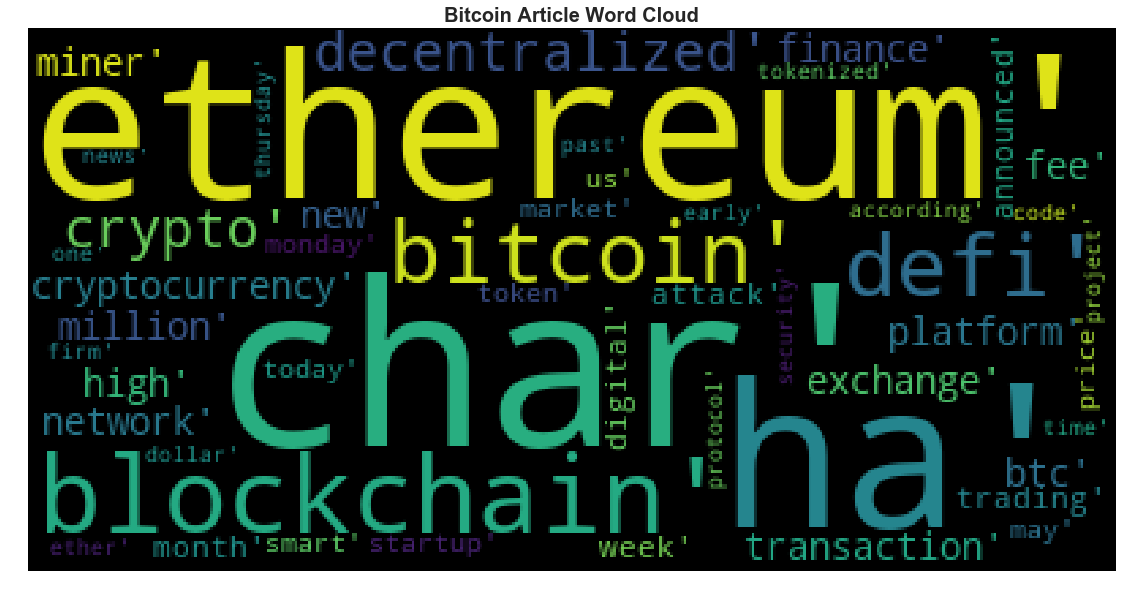

In [23]:
# Generate the Ethereum word cloud

# Must convert from list to string

top_words_ethereum = str(token_count(ethereum_words_tokenized, N=50))

wordcloud = WordCloud().generate(top_words_ethereum)
plt.imshow(wordcloud)
plt.axis('off')
fontdict = {"fontsize": 20, "fontweight": "bold"}
plt.title("Ethereum Article Word Cloud", fontdict=fontdict)
plt.show()

# Named Entity Recognition

In this section, you will build a named entity recognition model for both coins and visualize the tags using SpaCy.

In [24]:
import spacy
from spacy import displacy

In [25]:
# Optional - download a language model for SpaCy
# !python -m spacy download en_core_web_sm

In [26]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

## Bitcoin NER

In [27]:
# Concatenate all of the bitcoin text together

bitcoin_text = ' '.join(bitcoin_df['text'].to_list())

#bitcoin_text

In [28]:
# Run the NER processor on all of the text
doc = nlp(bitcoin_text)

# Add a title to the document
# YOUR CODE HERE!

In [29]:
# Render the visualization
displacy.render(doc, style='ent')

In [30]:
# List all Entities
labels_entities_bitcoin = [[ent.text, ent.label_] for ent in doc.ents]

labels_entities_bitcoin

[['Two', 'CARDINAL'],
 ['Singapore', 'GPE'],
 ['365,000 Singapore dollars', 'MONEY'],
 ['bitcoin', 'GPE'],
 ['US', 'GPE'],
 ['UK', 'GPE'],
 ['five years', 'DATE'],
 ['The Dark Overlord', 'WORK_OF_ART'],
 ['Nathan Wyatt', 'PERSON'],
 ['Alexis Akwagyiram', 'PERSON'],
 ['Tom Wilson', 'PERSON'],
 ['Monthly', 'DATE'],
 ['Africa', 'LOC'],
 ['55%', 'PERCENT'],
 ['a year', 'DATE'],
 ['Nigeria', 'GPE'],
 ['South Africa', 'GPE'],
 ['Kenya', 'GPE'],
 ['VPN', 'PRODUCT'],
 ['LAGOS/LONDON', 'ORG'],
 ['Reuters', 'ORG'],
 ['Four months ago', 'DATE'],
 ['Abolaji Odunjo', 'ORG'],
 ['Lagos', 'GPE'],
 ['LAGOS/LONDON', 'ORG'],
 ['Reuters', 'ORG'],
 ['Four months ago', 'DATE'],
 ['Abolaji Odunjo', 'ORG'],
 ['Lagos', 'GPE'],
 ['Satoshi Nakaboto', 'ORG'],
 ['Bitcoin', 'GPE'],
 ['Bitcoin', 'GPE'],
 ['Today', 'DATE'],
 ['Satoshi Nakaboto', 'PERSON'],
 ['Bitcoin', 'GPE'],
 ['Satoshi Nakaboto', 'ORG'],
 ['Bitcoin', 'GPE'],
 ['Bitcoin', 'GPE'],
 ['Today', 'DATE'],
 ['Satoshi Nakaboto', 'PERSON'],
 ['Bitcoin', 'GPE

---

## Ethereum NER

In [31]:
# Concatenate all of the ethereum text together
ethereum_text = ' '.join(ethereum_df['text'].to_list())

In [32]:
# Run the NER processor on all of the text
doc = nlp(ethereum_text)

# Add a title to the document
# YOUR CODE HERE!

In [33]:
# Render the visualization
displacy.render(doc, style='ent')

In [34]:
# List all Entities
labels_entities_ethereum = [[ent.text, ent.label_] for ent in doc.ents]

labels_entities_ethereum

[['the past couple of years', 'DATE'],
 ['The Complete Stock and Cryptocurrency Investment Toolkit Bundle', 'ORG'],
 ['29.46', 'MONEY'],
 ['Sept. 7', 'DATE'],
 ['97%', 'PERCENT'],
 ['September', 'DATE'],
 ['18', 'DATE'],
 ['2020', 'DATE'],
 ['6 min', 'QUANTITY'],
 ['five years ago', 'DATE'],
 ['Ethereum', 'ORG'],
 ['ETH', 'ORG'],
 ['LONDON', 'GPE'],
 ['Reuters', 'ORG'],
 ['about 20%', 'PERCENT'],
 ['NEW YORK', 'PERSON'],
 ['Reuters', 'ORG'],
 ['Brooklyn', 'GPE'],
 ['ConsenSys', 'ORG'],
 ['JPMorgan Chase &amp', 'ORG'],
 ['Quorum', 'PRODUCT'],
 ['Tuesday', 'DATE'],
 ['the Interactive Learn', 'LOC'],
 ['SEC', 'ORG'],
 ['OCC', 'ORG'],
 ['fiat', 'ORG'],
 ['yesterday', 'DATE'],
 ['fiat', 'ORG'],
 ['this year', 'DATE'],
 ['Satoshi Nakaboto', 'ORG'],
 ['Bitcoin', 'GPE'],
 ['Bitcoin', 'GPE'],
 ['Today', 'DATE'],
 ['Satoshi Nakaboto', 'PERSON'],
 ['Bitcoin', 'GPE'],
 ['second', 'ORDINAL'],
 ['one', 'CARDINAL'],
 ['bitcoin', 'GPE'],
 ['more than 10%', 'PERCENT'],
 ['24-hour', 'TIME'],
 ['$100 mil